**Random Forest Algoritması**

fetch_olivetti_faces veri seti yüz tanıma gibi görüntü işleme görevleri için sıklıkla kullanılır.

Veri Setinin Özellikleri
40 farklı kişinin her birinden 10 farklı pozda toplam 400 adet gri tonlamalı yüz görüntüsü içerir.
Yüzler, aynı ışıklandırma ve benzer arka plan koşullarında çekilmiştir. Bu sayede, yüz tanıma algoritmalarının yüz özelliklerine odaklanmasını sağlar.
Her bir görüntü 64x64 piksel boyutundadır.
Scikit-learn'in datasets modülü içinde yer alır.

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
oli=fetch_olivetti_faces() # 40 farklı insandan alınan her bir insana ait 10 görüntü var


In [15]:
oli_df = pd.DataFrame(oli.data)
oli_df # tek boyutlu bir 4096 feature'dan oluşuyor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,4046,4047,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.776860,0.776860,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,0.719008,0.719008,0.714876,0.719008,0.719008,0.723140,0.727273,0.735537,0.714876,0.723140,0.719008,...,0.661157,0.636364,0.644628,0.665289,0.727273,0.747934,0.756198,0.772727,0.776860,0.760331,0.756198,0.752066,0.694215,0.690083,0.681818,0.681818,0.657025,0.648760,0.636364,0.632231,0.636364,0.623967,0.619835,0.644628,0.681818,0.685950,0.677686,0.681818,0.673554,0.665289,0.632231,0.582645,0.541322,0.537190,0.537190,0.553719,0.570248,0.611570,0.632231,0.657025,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.723140,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,0.706612,0.702479,0.702479,0.702479,0.690083,0.681818,0.690083,0.685950,0.669421,0.677686,0.665289,...,0.632231,0.640496,0.615702,0.611570,0.586777,0.607438,0.632231,0.644628,0.661157,0.652893,0.673554,0.661157,0.652893,0.628099,0.632231,0.644628,0.640496,0.628099,0.632231,0.636364,0.628099,0.619835,0.619835,0.603306,0.590909,0.561983,0.516529,0.533058,0.578512,0.570248,0.561983,0.557851,0.545455,0.111570,0.095041,0.152893,0.152893,0.128099,0.136364,0.132231,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.723140,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830579,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,0.710744,0.719008,0.702479,0.702479,0.702479,0.706612,0.706612,0.719008,0.706612,0.710744,0.710744,...,0.677686,0.644628,0.661157,0.710744,0.739669,0.719008,0.723140,0.756198,0.764463,0.752066,0.719008,0.714876,0.706612,0.685950,0.665289,0.652893,0.644628,0.636364,0.623967,0.636364,0.657025,0.644628,0.677686,0.681818,0.690083,0.690083,0.690083,0.681818,0.661157,0.652893,0.636364,0.586777,0.545455,0.570248,0.607438,0.603306,0.595041,0.578512,0.607438,0.413223,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,0.537190,0.566116,0.574380,0.586777,0.611570,0.632231,0.640496,0.657025,0.673554,0.694215,0.702479,0.719008,0.727273,0.719008,0.723140,0.710744,0.739669,0.747934,0.756198,0.756198,0.764463,0.772727,0.785124,0.785124,0.805785,0.818182,0.805785,0.809917,0.793388,0.789256,0.785124,0.776860,0.785124,0.768595,0.785124,0.776860,0.780992,0.789256,0.780992,0.776860,...,0.045455,0.173554,0.210744,0.202479,0.185950,0.181818,0.214876,0.272727,0.326446,0.384298,0.400826,0.442149,0.479339,0.512397,0.537190,0.557851,0.566116,0.586777,0.586777,0.615702,0.632231,0.661157,0.681818,0.673554,0.714876,0.710744,0.706612,0.690083,0.681818,0.623967,0.615702,0.586777,0.582645,0.578512,0.590909,0.590909,0.611570,0.628099,0.644628,0.657025,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066

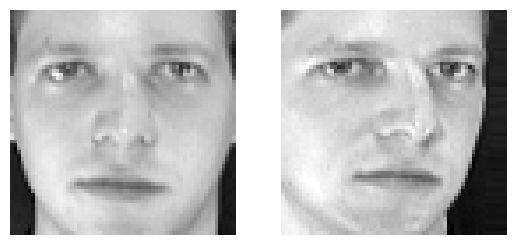

In [19]:
plt.figure()
for i in range(2): # 2 görüntü görselleştirmek için
  plt.subplot(1,2,i+1) # 1 satır 2 sütundan oluşsun
  plt.imshow(oli.images[i],cmap="gray")
  plt.axis("off")
plt.show()

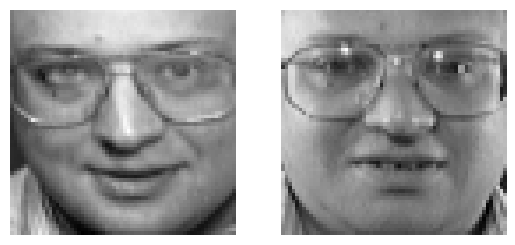

In [20]:
plt.figure()
for i in range(2): # 2 görüntü görselleştirmek için
  plt.subplot(1,2,i+1) # 1 satır 2 sütundan oluşsun
  plt.imshow(oli.images[i+300],cmap="gray")
  plt.axis("off")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=oli.data
y=oli.target

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)

In [37]:
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred=rf_classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
acc=accuracy_score(Y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9375


In [64]:
accuracy_values=[]
n_estimators_values=[]
for k in range(1,30):
 rf_classifier=RandomForestClassifier(n_estimators=k,random_state=42)
 rf_classifier.fit(X_train,Y_train)
 y_pred=rf_classifier.predict(X_test)
 acc=accuracy_score(Y_test,y_pred)
 accuracy_values.append(acc)
 n_estimators_values.append(k)

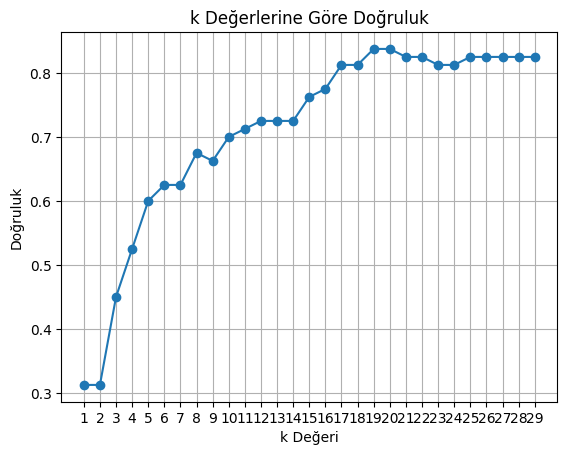

In [65]:
plt.figure()
plt.plot(n_estimators_values,accuracy_values,marker="o",linestyle="-")
plt.title("k Değerlerine Göre Doğruluk")
plt.xlabel("k Değeri")
plt.ylabel("Doğruluk")
plt.xticks(n_estimators_values) # X ekseni k değerleri olsun
plt.grid(True)
plt.show()

**Random Forest Regresssion**

In [44]:
from sklearn.datasets import fetch_california_housing

In [45]:
california_housing=fetch_california_housing()
california_df=pd.DataFrame(california_housing.data)
print(california_df)

            0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]


In [46]:
x_reg=california_housing.data
y_reg=california_housing.target

In [47]:
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg=train_test_split(x_reg,y_reg,test_size=0.2,random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_Reg=RandomForestRegressor(random_state=42)

In [51]:
rf_Reg.fit(X_train_reg,Y_train_reg)

RandomForestRegressor(random_state=42)

In [52]:
y_pred_reg=rf_Reg.predict(X_test_reg)

In [58]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [57]:
mse=mean_squared_error(Y_test_reg,y_pred_reg)
print("MSE:",mse)

MSE: 0.2553684927247781


In [59]:
rms=root_mean_squared_error(Y_test_reg,y_pred_reg)
print("RMSE:",rms)

RMSE: 0.5053399773665033


In [60]:
rms1=np.sqrt(mse)
print("RMSE:",rms1)

RMSE: 0.5053399773665033


Olması gereken değerlerden 0.5'lik bir sapma ile tahmin ediliyor demektir.